In [10]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd  
import importlib
import os
import numpy as np
from skimage import measure
from ipywidgets import interact
from ipywidgets import interact_manual
from IPython.display import display
from ipywidgets import widgets

In [11]:
import ipynb.fs.full.wspFFA as wspFirefly
import ipynb.fs.full.wspCS as wspCuckooSearch
import ipynb.fs.full.wspKH as wspKrillHerd
import ipynb.fs.full.wspEHO as wspElephantHerding
import ipynb.fs.full.wspABC as wspArtificialBeeColony

import ipynb.fs.full.plotGraph as plotGraph
import ipynb.fs.full.wspMultithreshold as wspMultithreshold
import ipynb.fs.full.dicomHandler as dicomHandler

importlib.reload(wspFirefly)
importlib.reload(wspCuckooSearch)
importlib.reload(wspKrillHerd)
importlib.reload(wspElephantHerding)
importlib.reload(wspArtificialBeeColony)

importlib.reload(plotGraph)
importlib.reload(wspMultithreshold)
importlib.reload(dicomHandler)

<module 'ipynb.fs.full.dicomHandler' (/mnt/6884ACCB84AC9CD6/OneDrive - FEI/Aulas/Graduacao/8 - Semestre/CC8421 - TRABALHO FINAL DE CURSO II/image-segmentation/dicomHandler.ipynb)>

In [12]:
folder_dir = "../Database/2EFVJVCN/"
file = "I1680000"
bio_algorithms = 'FFA'
dimension = 2
q = 1

In [13]:
image = folder_dir + file

In [14]:
dicom_image, pixel_array = dicomHandler.read_dicom_image(image)

transformed_pixel_array = dicomHandler.image_transformation(pixel_array)

original_image = pixel_array.copy()
    
hu_image = dicomHandler.transform_to_hu(dicom_image, transformed_pixel_array)

hist, bin_edges, best_thresholds, img_thres = wspMultithreshold.wspMultithreshold(hu_image, bio_algorithms, dimension, q)

In [15]:
high_intensity = wspMultithreshold.get_high_intensity_pixels(img_thres)

pixel_array = dicomHandler.transform_to_pixel_array(dicom_image, high_intensity)

hard_tissue = wspMultithreshold.get_largests_regions(pixel_array, original_image)

-1024.0 1923.0


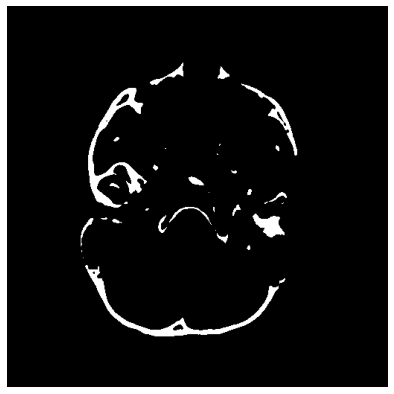

In [16]:
dicomHandler.show_dicom_image(pixel_array)